## Ingienería de Variables climáticas y de tiendas de tiendas

In [18]:
import pandas as pd
import numpy as np
from datetime import datetime
import folium as fo
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



In [19]:
df_shop = pd.read_excel('shops_en2.xls')


In [20]:
df_shop

,shop_name,shop_id,city,hab,max_01,min_01,max_02,min_02,max_03,min_03,...,luz_marzo,luz_abril,luz_mayo,luz_junio,luz_julio,luz_agosto,luz_septiembre,luz_octubre,Luz_noviembre,luz_diciembre
0,"! Yakutsk Ordzhonikidze, 56 Franc,0",0,Yakutsk,299200,-33.0,-36.0,-22,-33.0,-5.0,-19.0,...,11.34,14.38,17.33,19.39,18.53,16.10,13.08,10.13,7.14,5.15
1,"! Yakutsk TC ""Central"" Franc,1",1,Yakutsk,299200,-33.0,-36.0,-22,-33.0,-5.0,-19.0,...,11.34,14.38,17.33,19.39,18.53,16.10,13.08,10.13,7.14,5.15
2,"Adygea TC ""Mega"",2",2,Adygea,450000,4.2,-2.8,5,-2.3,9.1,0.5,...,11.53,13.29,14.50,15.34,15.15,14.04,12.32,11.00,9.34,8.48
3,"Balashikha TRC ""October-Kinomir"",3",3,Balashikha,468221,-5.0,-11.0,-2,-9.0,6.0,-2.0,...,11.49,14.13,16.18,17.34,16.58,15.03,12.44,10.27,8.16,7.02
4,"Volzhsky mall ""Volga Mall"",4",4,Volzhsky,320761,-4.0,-10.0,0,-7.0,10.0,1.0,...,11.47,14.11,16.17,17.33,16.59,15.05,12.46,10.28,8.16,7.01
5,"Vologda SEC ""Marmalade"",5",5,Vologda,305397,-7.0,-15.0,-3,-12.0,4.0,-5.0,...,11.47,14.11,16.17,17.33,16.59,15.05,12.46,10.28,8.16,7.01
6,"Voronezh (Plekhanovskaya, 13),6",6,Voronezh,997447,-4.0,-11.0,-1,-8.0,7.0,-1.0,...,11.47,14.11,16.17,17.33,16.59,15.05,12.46,10.28,8.16,7.01
7,"Voronezh TRC ""Maksimir"",7",7,Voronezh,997447,-4.0,-11.0,-1,-8.0,7.0,-1.0,...,11.47,14.11,16.17,17.33,16.59,15.05,12.46,10.28,8.16,7.01
8,"Voronezh TRC City-Park ""City"",8",8,Voronezh,997447,-4.0,-11.0,-1,-8.0,7.0,-1.0,...,11.47,14.11,16.17,17.33,16.59,15.05,12.46,10.28,8.16,7.01
9,"Itinerant trade,9",9,no city,0,20.0,20.0,20,20.0,20.0,20.0,...,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00


In [21]:
df_shop.columns

Index(['shop_name', 'shop_id', 'city', 'hab', 'max_01', 'min_01', 'max_02',
       'min_02', 'max_03', 'min_03', 'max_04', 'min_04', 'max_05', 'min_05',
       'max_06', 'min_06', 'max_07', 'min_07', 'max_08', 'min_08', 'max_09',
       'min_09', 'max_10', 'min_10', 'max_11', 'min_11', 'max_12', 'min_12',
       'l_enero', 'l_febrero', 'l_marzo', 'l_abril', 'l_mayo', 'l_junio',
       'l_julio', 'l_agosto', 'l-sep', 'l_oct', 'l_nov', 'l_dic', 'coor',
       'luz_enero', 'luz_febrero', 'luz_marzo', 'luz_abril', 'luz_mayo',
       'luz_junio', 'luz_julio', 'luz_agosto', 'luz_septiembre', 'luz_octubre',
       'Luz_noviembre', 'luz_diciembre'],
      dtype='object')

# Este es el codigo para poner cada tempetarura, lluvia y horas de luz, de cada ciudad

In [22]:
df_shop_max = df_shop[[ 'shop_id', 'max_01', 'max_02', 'max_03', 'max_04', 'max_05',
       'max_06', 'max_07', 'max_08', 'max_09', 'max_10', 'max_11', 'max_12']]
df_shop_min = df_shop[[ 'shop_id', 'min_01', 'min_02', 'min_03', 'min_04', 'min_05',
       'min_06', 'min_07', 'min_08', 'min_09', 'min_10', 'min_11', 'min_12']]
df_shop_lluvia = df_shop[[ 'shop_id', 'l_enero', 'l_febrero', 'l_marzo', 'l_abril', 'l_mayo', 'l_junio',
       'l_julio', 'l_agosto', 'l-sep', 'l_oct', 'l_nov', 'l_dic']]
df_shop_luz = df_shop[[ 'shop_id', 'luz_enero', 'luz_febrero', 'luz_marzo', 'luz_abril', 'luz_mayo',
       'luz_junio', 'luz_julio', 'luz_agosto', 'luz_septiembre', 'luz_octubre',
       'Luz_noviembre', 'luz_diciembre']]



In [23]:
df_shop_max = df_shop_max.melt(id_vars=['shop_id'],var_name='month',value_name='temp_max')
df_shop_max = df_shop_max.replace({'max_01':1,'max_02':2,'max_03':3, 'max_04':4, 'max_05':5,
       'max_06':6, 'max_07':7, 'max_08':8, 'max_09':9, 'max_10':10, 'max_11':11, 'max_12':12})

df_shop_min = df_shop_min.melt(id_vars=['shop_id'],var_name='month',value_name='temp_min')
df_shop_min = df_shop_min.replace({'min_01':1,'min_02':2,'min_03':3, 'min_04':4, 'min_05':5,
       'min_06':6, 'min_07':7, 'min_08':8, 'min_09':9, 'min_10':10, 'min_11':11, 'min_12':12})

df_shop_lluvia = df_shop_lluvia.melt(id_vars=['shop_id'],var_name='month',value_name='rain')
df_shop_lluvia = df_shop_lluvia.replace({'l_enero':1, 'l_febrero':2, 'l_marzo':3, 'l_abril':4, 'l_mayo':5, 'l_junio':6,
       'l_julio':7, 'l_agosto':8, 'l-sep':9, 'l_oct':10, 'l_nov':11, 'l_dic':12})

df_shop_luz = df_shop_luz.melt(id_vars=['shop_id'],var_name='month',value_name='light')
df_shop_luz = df_shop_luz.replace({'luz_enero':1, 'luz_febrero':2, 'luz_marzo':3, 'luz_abril':4, 'luz_mayo':5,
       'luz_junio':6, 'luz_julio':7, 'luz_agosto':8, 'luz_septiembre':9, 'luz_octubre':10,
       'Luz_noviembre':11, 'luz_diciembre':12})


In [24]:
df_shop1 = pd.merge(df_shop_max,df_shop_min,on=["shop_id",'month'])
df_shop2 = pd.merge(df_shop_lluvia,df_shop_luz,on=["shop_id",'month'])
df_shop3 = pd.merge(df_shop1,df_shop2,on=["shop_id",'month'])
df_shop3

,shop_id,month,temp_max,temp_min,rain,light
0,0,1,-33.0,-36.0,0.00,5.58
1,1,1,-33.0,-36.0,0.00,5.58
2,2,1,4.2,-2.8,0.28,9.08
3,3,1,-5.0,-11.0,0.20,7.37
4,4,1,-4.0,-10.0,0.13,7.35
...,...,...,...,...,...,...
715,55,12,20.0,0.0,0.22,12.00
716,56,12,-6.0,-14.0,0.21,7.10
717,57,12,-36.0,-42.0,0.01,5.15
718,58,12,-36.0,-42.0,0.01,5.15


In [25]:
df_shop.columns

Index(['shop_name', 'shop_id', 'city', 'hab', 'max_01', 'min_01', 'max_02',
       'min_02', 'max_03', 'min_03', 'max_04', 'min_04', 'max_05', 'min_05',
       'max_06', 'min_06', 'max_07', 'min_07', 'max_08', 'min_08', 'max_09',
       'min_09', 'max_10', 'min_10', 'max_11', 'min_11', 'max_12', 'min_12',
       'l_enero', 'l_febrero', 'l_marzo', 'l_abril', 'l_mayo', 'l_junio',
       'l_julio', 'l_agosto', 'l-sep', 'l_oct', 'l_nov', 'l_dic', 'coor',
       'luz_enero', 'luz_febrero', 'luz_marzo', 'luz_abril', 'luz_mayo',
       'luz_junio', 'luz_julio', 'luz_agosto', 'luz_septiembre', 'luz_octubre',
       'Luz_noviembre', 'luz_diciembre'],
      dtype='object')

Elimino las columnas que ya no necesito

In [26]:
df_shop = df_shop.drop(['max_01', 'min_01', 'max_02',
       'min_02', 'max_03', 'min_03', 'max_04', 'min_04', 'max_05', 'min_05',
       'max_06', 'min_06', 'max_07', 'min_07', 'max_08', 'min_08', 'max_09',
       'min_09', 'max_10', 'min_10', 'max_11', 'min_11', 'max_12', 'min_12',
       'l_enero', 'l_febrero', 'l_marzo', 'l_abril', 'l_mayo', 'l_junio',
       'l_julio', 'l_agosto', 'l-sep', 'l_oct', 'l_nov', 'l_dic', 'coor',
       'luz_enero', 'luz_febrero', 'luz_marzo', 'luz_abril', 'luz_mayo',
       'luz_junio', 'luz_julio', 'luz_agosto', 'luz_septiembre', 'luz_octubre',
       'Luz_noviembre', 'luz_diciembre'],axis = 1)

In [27]:
df_shop = df_shop.merge(df_shop3, on= 'shop_id')

In [28]:
df_shop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   shop_name  720 non-null    object 
 1   shop_id    720 non-null    int64  
 2   city       720 non-null    object 
 3   hab        720 non-null    int64  
 4   month      720 non-null    int64  
 5   temp_max   720 non-null    float64
 6   temp_min   720 non-null    float64
 7   rain       720 non-null    float64
 8   light      720 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 56.2+ KB


In [29]:
def temp(temp):
    if temp <= -20:
        return 'chilly'
    elif temp >-20 and temp == 0:
        return 'cool'
    elif temp >0 and temp <13:
        return 'mild'
    else:
        return 'heat'
df_shop['climate_max']=df_shop['temp_max'].apply(temp).astype(str)
df_shop['climate_min']=df_shop['temp_min'].apply(temp).astype(str)

In [30]:
def light(light):
    if light <= 6:
        return 'winter_dark'
    elif light > 6 and light <= 8:
        return 'winter'
    elif light >8 and light >= 10:
        return 'spring'
    else:
        return 'summer'
df_shop['h_light']= df_shop['light'].apply(light).astype(str)


In [31]:
def rain(rain):
    if rain == 0:
        return 'dry'
    elif rain <= 0.10:
        return 'semi_dry'
    elif rain > 0.10 and rain <= 0.20:
        return 'damp'
    elif rain == 50:
        return 'online'
    else:
        return 'wet'
df_shop['class_rain']= df_shop['rain'].apply(light).astype(str)


In [33]:
df_shop['climate_max'] = LabelEncoder().fit_transform(df_shop['climate_max'])
df_shop['climate_min'] = LabelEncoder().fit_transform(df_shop['climate_min'])
df_shop['h_light'] = LabelEncoder().fit_transform(df_shop['h_light'])
df_shop['class_rain'] = LabelEncoder().fit_transform(df_shop['class_rain'])




In [34]:
df_shop.head()

,shop_name,shop_id,city,hab,month,temp_max,temp_min,rain,light,climate_max,climate_min,h_light,class_rain
0,"! Yakutsk Ordzhonikidze, 56 Franc,0",0,Yakutsk,299200,1,-33.0,-36.0,0.00,5.58,0,0,3,0
1,"! Yakutsk Ordzhonikidze, 56 Franc,0",0,Yakutsk,299200,2,-22.0,-33.0,0.01,8.42,0,0,1,0
2,"! Yakutsk Ordzhonikidze, 56 Franc,0",0,Yakutsk,299200,3,-5.0,-19.0,0.03,11.34,2,2,0,0
3,"! Yakutsk Ordzhonikidze, 56 Franc,0",0,Yakutsk,299200,4,3.0,-7.0,0.10,14.38,3,2,0,0
4,"! Yakutsk Ordzhonikidze, 56 Franc,0",0,Yakutsk,299200,5,18.0,6.0,0.19,17.33,2,3,0,0


Agrupacion de ciudades por habitantes

In [35]:
def poblacion(hab):
    if hab == 0:
        return 'online'
    elif hab <= 100000:
        return 'village'
    elif hab > 100000 and hab <= 200000:
        return 'small_city'
    elif hab >200000 and hab <= 500000:
        return ' medium_city'
    elif hab >500000 and hab <= 1000000:
        return 'big_city'
    else:
        return 'metropoly'

In [36]:
df_shop['type_city'] = df_shop['hab'].apply(poblacion)
df_shop

,shop_name,shop_id,city,hab,month,temp_max,temp_min,rain,light,climate_max,climate_min,h_light,class_rain,type_city
0,"! Yakutsk Ordzhonikidze, 56 Franc,0",0,Yakutsk,299200,1,-33.0,-36.0,0.00,5.58,0,0,3,0,medium_city
1,"! Yakutsk Ordzhonikidze, 56 Franc,0",0,Yakutsk,299200,2,-22.0,-33.0,0.01,8.42,0,0,1,0,medium_city
2,"! Yakutsk Ordzhonikidze, 56 Franc,0",0,Yakutsk,299200,3,-5.0,-19.0,0.03,11.34,2,2,0,0,medium_city
3,"! Yakutsk Ordzhonikidze, 56 Franc,0",0,Yakutsk,299200,4,3.0,-7.0,0.10,14.38,3,2,0,0,medium_city
4,"! Yakutsk Ordzhonikidze, 56 Franc,0",0,Yakutsk,299200,5,18.0,6.0,0.19,17.33,2,3,0,0,medium_city
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,"Yaroslavl shopping center ""Altair"",59",59,Yaroslavl,597161,8,18.0,9.0,0.30,15.18,2,3,0,0,big_city
716,"Yaroslavl shopping center ""Altair"",59",59,Yaroslavl,597161,9,11.0,4.0,0.29,12.49,3,3,0,0,big_city
717,"Yaroslavl shopping center ""Altair"",59",59,Yaroslavl,597161,10,2.0,-3.0,0.27,10.22,3,2,0,0,big_city
718,"Yaroslavl shopping center ""Altair"",59",59,Yaroslavl,597161,11,-5.0,-10.0,0.24,7.59,2,2,2,0,big_city


/Users/cesarhernandez/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type_city', ylabel='count'>

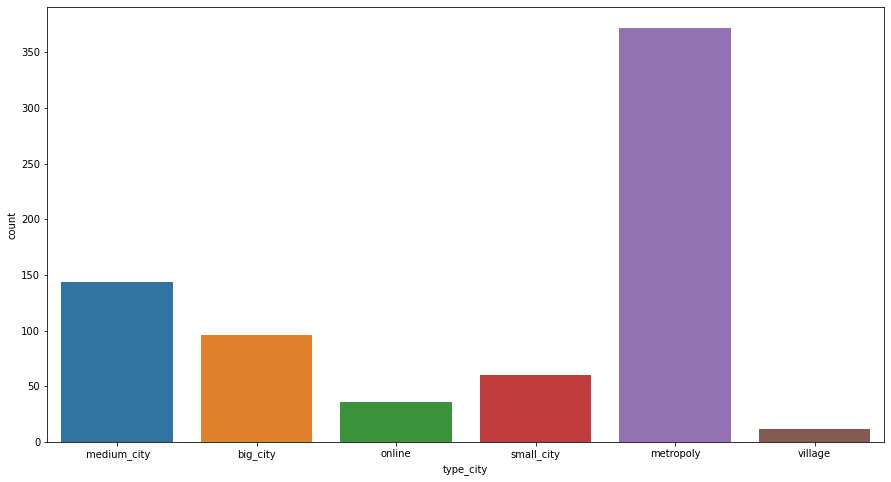

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(df_shop.type_city)

In [37]:
df_shop['type_city'] = LabelEncoder().fit_transform(df_shop['type_city'])


In [16]:
#binning para separar los habitantes en 6 categorias
#bins = np.linspace(min(df_shop["hab"]), max(df_shop["hab"]), 6)#divido la edad entre cuatro partes
#bins

In [17]:
#categorias = ['village', 'small_city', 'medium_city', 'big_city','metropoly']
#df_shop['type_city'] = pd.cut(df_shop['hab'], bins, labels=categorias, include_lowest=True )
#del bins
#del df_shop['hab']

In [38]:
df_shop.loc[df_shop['shop_id']==2,'shop_type']= 'megacenter'
df_shop.loc[df_shop['shop_id']==3,'shop_type']='shoppingmall'
df_shop.loc[df_shop['shop_id']==56,'shop_type']='shoppingmall'
df_shop.loc[df_shop['shop_id']==15,'shop_type']='shoppingmall'
df_shop.loc[df_shop['shop_id'].between(13,14),'shop_type']='megacenter'
df_shop.loc[df_shop['shop_id']==54,'shop_type']='megacenter'
df_shop.loc[df_shop['shop_id'].between(16,19),'shop_type']='megacenter'
df_shop.loc[df_shop['shop_id']==21,'shop_type']='other'
df_shop.loc[df_shop['shop_id']==20,'shop_type']='other'
df_shop.loc[df_shop['shop_id']==22,'shop_type']='other'
df_shop.loc[df_shop['shop_id'].between(23,24),'shop_type']='megacenter'
df_shop.loc[df_shop['shop_id'].between(26,28),'shop_type']='megacenter'
df_shop.loc[df_shop['shop_id'].between(31,32),'shop_type']='megacenter'
df_shop.loc[df_shop['shop_id']==25,'shop_type']='shoppingmall'
df_shop.loc[df_shop['shop_id'].between(29,30),'shop_type']='shoppingmall'
df_shop.loc[df_shop['shop_id']==33,'shop_type']='shoppingmall'
df_shop.loc[df_shop['shop_id']==9,'shop_type']='online'
df_shop.loc[df_shop['shop_id']==12,'shop_type']='online'
df_shop.loc[df_shop['shop_id']==55,'shop_type']='online'
df_shop.loc[df_shop['shop_id'].between(34,53),'shop_type']='shoppingmall'
df_shop.loc[df_shop['shop_id'].between(4,5),'shop_type']='shoppingmall'
df_shop.loc[df_shop['shop_id']==6,'shop_type']='other'
df_shop.loc[df_shop['shop_id'].between(7,8),'shop_type']='shoppingmall'
df_shop.loc[df_shop['shop_id']==0,'shop_type']='other'
df_shop.loc[df_shop['shop_id']==57,'shop_type']='other'
df_shop.loc[df_shop['shop_id']==1,'shop_type']='shoppingmall'
df_shop.loc[df_shop['shop_id'].between(58,59),'shop_type']='shoppingmall'
df_shop.loc[df_shop['shop_id'].between(10,11),'shop_type']='other'


/Users/cesarhernandez/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='shop_type', ylabel='count'>

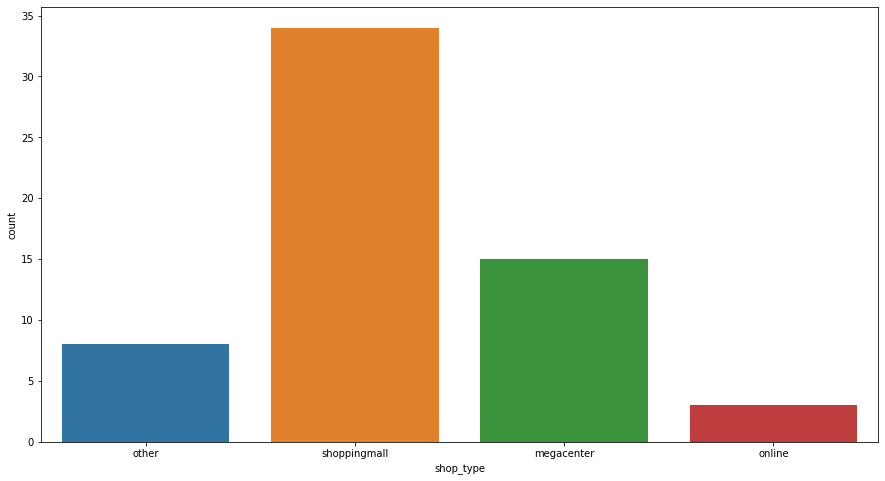

In [10]:
plt.figure(figsize=(15,8))
sns.countplot(df_shop.shop_type)


In [39]:
df_shop['shop_type'] = LabelEncoder().fit_transform(df_shop['shop_type'])


In [40]:
df_shop.columns

Index(['shop_name', 'shop_id', 'city', 'hab', 'month', 'temp_max', 'temp_min',
       'rain', 'light', 'climate_max', 'climate_min', 'h_light', 'class_rain',
       'type_city', 'shop_type'],
      dtype='object')

In [41]:
df_shop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   shop_name    720 non-null    object 
 1   shop_id      720 non-null    int64  
 2   city         720 non-null    object 
 3   hab          720 non-null    int64  
 4   month        720 non-null    int64  
 5   temp_max     720 non-null    float64
 6   temp_min     720 non-null    float64
 7   rain         720 non-null    float64
 8   light        720 non-null    float64
 9   climate_max  720 non-null    int64  
 10  climate_min  720 non-null    int64  
 11  h_light      720 non-null    int64  
 12  class_rain   720 non-null    int64  
 13  type_city    720 non-null    int64  
 14  shop_type    720 non-null    int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 90.0+ KB


In [42]:
df_shop = df_shop.drop(['shop_name','city'],axis= 1)

In [44]:
df_shop.shop_id = df_shop.shop_id.astype('int8')
df_shop.month = df_shop.month.astype('int8')
df_shop.climate_max = df_shop.climate_max.astype('int8')
df_shop.climate_min = df_shop.climate_min.astype('int8')
df_shop.h_light = df_shop.h_light.astype('int8')
df_shop.class_rain = df_shop.class_rain.astype('int8')
df_shop.type_city = df_shop.type_city.astype('int8')
df_shop.shop_type = df_shop.shop_type.astype('int8')


In [45]:
df_shop.isnull().sum()

shop_id        0
hab            0
month          0
temp_max       0
temp_min       0
rain           0
light          0
climate_max    0
climate_min    0
h_light        0
class_rain     0
type_city      0
shop_type      0
dtype: int64

In [46]:
df_shop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 719
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   shop_id      720 non-null    int8   
 1   hab          720 non-null    int64  
 2   month        720 non-null    int8   
 3   temp_max     720 non-null    float64
 4   temp_min     720 non-null    float64
 5   rain         720 non-null    float64
 6   light        720 non-null    float64
 7   climate_max  720 non-null    int8   
 8   climate_min  720 non-null    int8   
 9   h_light      720 non-null    int8   
 10  class_rain   720 non-null    int8   
 11  type_city    720 non-null    int8   
 12  shop_type    720 non-null    int8   
dtypes: float64(4), int64(1), int8(8)
memory usage: 39.4 KB


In [47]:
df_shop.to_pickle('df1_Shop.pkl')
